In [157]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from data_utils import load_business_data_geo, load_census_data_joined, load_census_data

In [2]:
business_gdf = load_business_data_geo()

In [3]:
business_census_gdf = load_census_data_joined()

In [88]:
census_df = load_census_data()

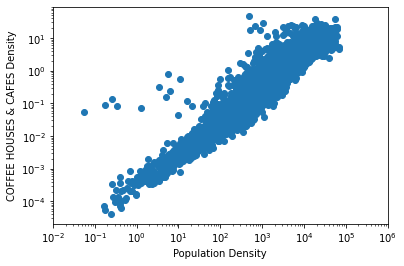

COFFEE HOUSES & CAFES has a population density ranging from 0.00 to 69239.38 and 4 tracts (of 9703 in total) with no population


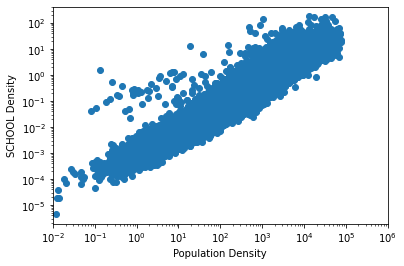

SCHOOL has a population density ranging from 0.00 to 77515.49 and 36 tracts (of 53968 in total) with no population


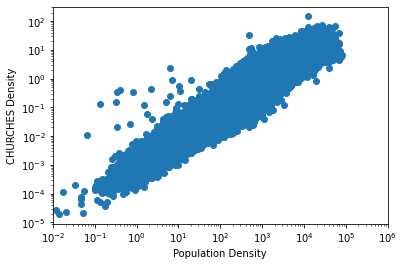

CHURCHES has a population density ranging from 0.00 to 80359.76 and 13 tracts (of 56609 in total) with no population


In [193]:
# business_census_gdf[business_census_gdf["fldHeading"].str.contains("SCHOOL")]
# business_census_gdf[business_census_gdf["fldHeading"].str.contains("CHURCHES")]
# category = "COFFEE HOUSES & CAFES"
category = "SCHOOL"
for category in ["COFFEE HOUSES & CAFES", "SCHOOL", "CHURCHES"]:
    sub_df = business_census_gdf[business_census_gdf["fldHeading"].str.contains(category)]
    GEOIDS_of_interest = sub_df["GEOID10"]
    value_counts = sub_df["GEOID10"].value_counts().reset_index().rename(columns={"index":"GEOID10", "GEOID10": "Count"})
    census_df_sub = census_df[census_df["GEOID10"].isin(sub_df["GEOID10"])][["GEOID10", "ALAND10", "DP0010001"]]
    joined_sub = pd.merge(value_counts, census_df_sub)
    joined_sub["ALAND10_KM2"] = joined_sub["ALAND10"]/1e6
    joined_sub["POP_DENSITY"] = joined_sub["DP0010001"] / joined_sub["ALAND10_KM2"]
    joined_sub["COUNT_DENSITY"] = joined_sub["Count"] / joined_sub["ALAND10_KM2"]
    plt.scatter(joined_sub["POP_DENSITY"], joined_sub["COUNT_DENSITY"])
    plt.yscale("log")
    plt.xscale("log")
    plt.xlim((1e-2, 1e6))
    plt.xlabel("Population Density")
    plt.ylabel("{} Density".format(category))
    plt.show()
    print("The category {} has a population density ranging from {:.2f} to {:.2f} people / KM^2 of land area and {:d} tracts (of {:d} in total) have no population".format(category,joined_sub["POP_DENSITY"].min(), joined_sub["POP_DENSITY"].max(), (joined_sub["POP_DENSITY"] == 0).sum(), joined_sub.shape[0]))
